In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library("ggpubr")
library(NMF)
library("ica")
library(ICtest)

library(repr)
fileDir = "/home/beraslan/jovian-work/analysisSingle/"
geneCutOff=4
targetCutOff=15
nFactors=15

corrplot 0.84 loaded


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following o

In [42]:
myR2 <- function(preds, actual){
    rss <- sum((preds - actual) ^ 2)  ## residual sum of squares
    tss <- sum((actual - mean(actual)) ^ 2)  ## total sum of squares
    rsq <- 1 - rss/tss
}


In [15]:
selCoefs <- read.csv("/home/beraslan/jovian-work/analysisSingle/SignificantCoefMatrix.csv", row.names = 1)
selCoefs <- t(selCoefs)
KOGenes <-  colnames(selCoefs)
KOGenes <- sapply(KOGenes, function(x){strsplit(x,"_")[[1]][2]})
colnames(selCoefs) <- KOGenes

In [16]:
head(selCoefs)

,Rack1,Utp15,Wdr43,Raf1,Rrp9,Uhrf1,Myc,Wdr3,Aamp,Dcaf13,⋯,Acaca,Trim45,Rnf135,Dcaf10,Traf7,Zmiz2,Klhl30,Wdr91,Efcab8,Wdr81
Eef1a1,-0.052,-0.147,-0.238,-0.125,-0.135,0.063,-0.397,0.028,-0.052,-0.101,⋯,0.158,-0.042,0.004,0.038,0.025,-0.066,-0.016,0.061,-0.033,0.085
Tpt1,-0.255,-0.096,-0.261,-0.026,-0.079,-0.218,-0.158,-0.159,-0.323,-0.190,⋯,0.104,0.112,0.068,0.024,0.099,0.095,0.119,0.104,0.119,0.050
Rps27,-0.289,-0.235,-0.094,-0.097,-0.104,-0.116,-0.167,-0.087,-0.081,-0.159,⋯,0.075,0.087,0.070,-0.003,0.061,0.024,0.060,0.028,0.077,0.035
Rplp0,-0.328,-0.076,-0.110,-0.130,-0.008,-0.134,-0.586,-0.017,-0.031,-0.064,⋯,0.113,0.017,-0.018,0.145,0.103,0.105,0.017,0.015,0.082,0.047
Denr,-0.140,-0.042,-0.027,-0.047,-0.070,-0.208,-0.079,-0.098,0.140,-0.104,⋯,0.086,0.103,-0.057,-0.118,0.049,0.149,0.198,0.042,0.070,0.017
Hmgb2,-0.078,0.024,-0.019,-0.001,-0.032,-0.083,-0.089,0.054,0.011,-0.039,⋯,0.029,-0.011,0.013,-0.003,0.018,0.045,0.183,0.007,0.124,0.020


In [27]:
FOBIasymp(selCoefs,k = 20, type = "S1", model = "ICA")


	FOBI subgaussianty test using a weighted sum of chisquare test
	in an ICA model

data:  selCoefs
T = 393082, w1 = 22.741, df1 = 47894.000, w2 = 26.741, df2 = 1.000,
p-value = 1
alternative hypothesis: there are fewer than 309 gaussian components


In [26]:
FOBIboot(X=selCoefs, k=20, n.boot = 200, s.boot = "B1")


	ICA subgaussianity bootstrapping test using FOBI and strategy B1

data:  selCoefs
T = 121462267, replications = 200, p-value = 0.004975
alternative hypothesis: the last 309 components are not gaussian


In [28]:
test <- FOBIladle(selCoefs)
test
summary(test)
plot(test)

method :
[1] "FOBI"

k :
[1] 56

fn :
 [1] 0.00000000 0.01160228 0.01521041 0.01688008 0.01739139 0.01755240
 [7] 0.01760430 0.01770872 0.01771910 0.01772081 0.01772098 0.01772105
[13] 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105
[19] 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105
[25] 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105
[31] 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105
[37] 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105
[43] 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105
[49] 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105 0.01772105
[55] 0.01772105 0.01772105 0.01772105

phin :
 [1] 0.242639821 0.176315384 0.128034715 0.049308739 0.036853693 0.030421871
 [7] 0.027136561 0.023938115 0.018648818 0.016057759 0.015591160 0.011662059
[13] 0.010382628 0.009975036 0.009567027 0.009093105 0.008126813 0.007493601
[19] 0.007036966 0.006717802 0.006534514 0.006


FOBI Ladle estimator for selCoefs 
k:  56


ERROR: Error in plot.new(): figure margins too large


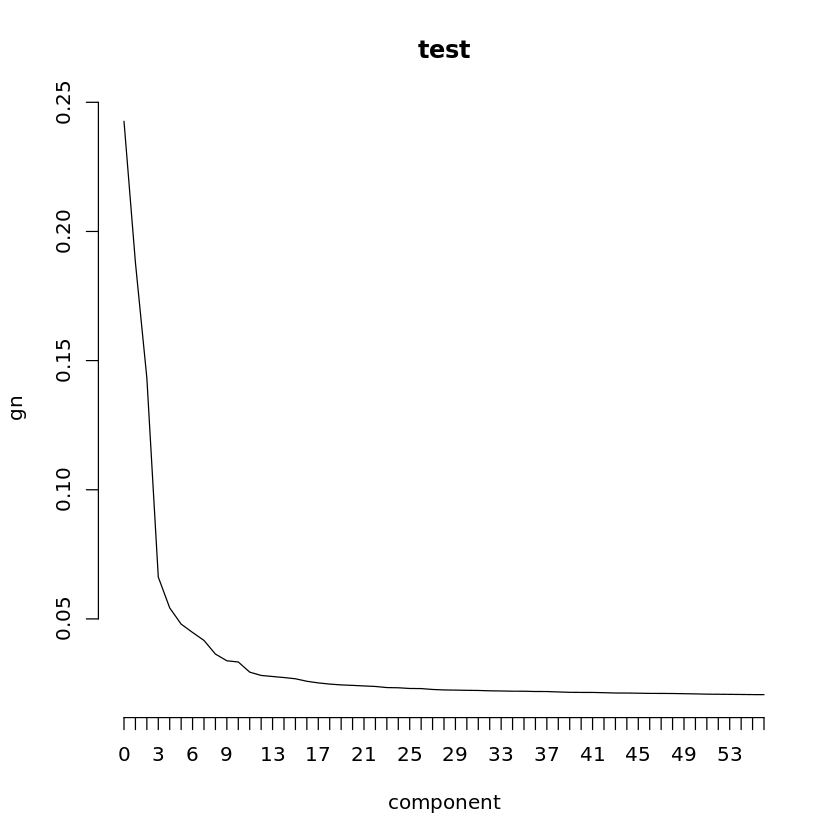

In [29]:
ladleplot(test)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 16 row(s) containing missing values (geom_path).”
Warning message:
“Removed 16 rows containing missing values (geom_point).”


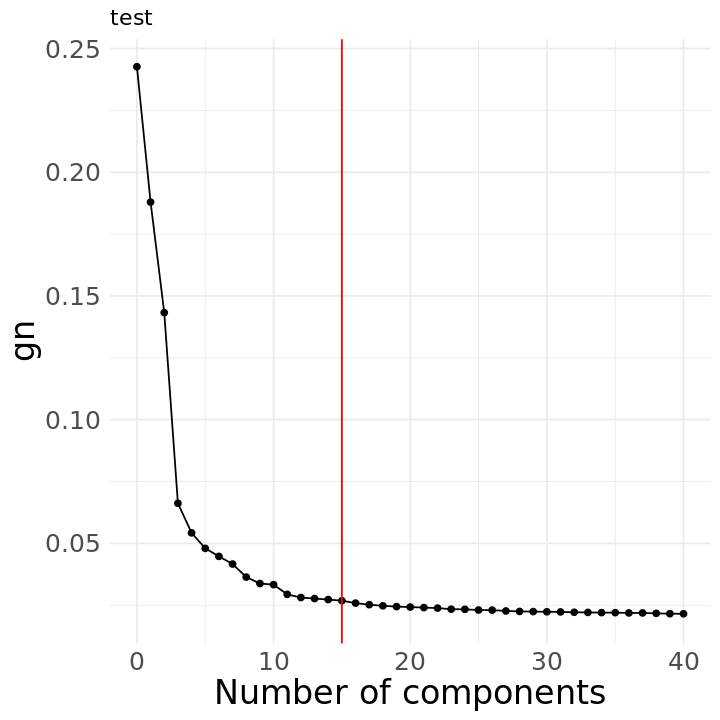

In [95]:
options(repr.plot.width=6, repr.plot.height=6)

ggladleplot(test, crit="gn")+theme_minimal()+
scale_x_continuous(breaks=seq(0, 40, 5))+
xlim(0,40)+xlab("Number of components")+
theme(axis.text=element_text(size=15),axis.title=element_text(size=20))+geom_vline(xintercept=15, color="red")


In [31]:
length(selCoefs)

[1] 342489

In [33]:
randomIndexes = sample(1:342489, 20000, replace=TRUE)

In [34]:
selCoefsTmp = copy(selCoefs)

In [35]:
selCoefsTmp[randomIndexes] = NA

In [96]:
k <- icaimax(selCoefs, nc = 15, center = T)

In [99]:
factorCov = cor((k$S), method = "pearson")

In [100]:
dim(factorCov)

[1] 15 15

In [105]:
diag(factorCov) <- 0

In [106]:
max(factorCov)

[1] 1.294164e-15

In [107]:
head(k$S)

Eef1a1,3.2076303,1.3438743,0.1653060,-0.50628202,-0.4093474,-0.61632815,-2.9845040,0.5615042,-1.38360324,0.6815733,0.003181004,-0.2919268,-0.5924283,0.2008912,0.1501019400
Tpt1,3.4941689,0.9892448,-1.4858057,0.94757071,0.4116365,0.49899746,-1.8205189,2.4839164,-0.11474302,-0.2635995,1.226277276,-0.6064411,0.9252480,-0.3329085,-0.2352713315
Rps27,2.3147870,0.3363645,-0.3363701,0.56331229,0.4034873,0.44700482,-0.7378011,1.1995266,0.21023918,0.3008786,0.788856719,0.2498786,0.1168422,-0.1822597,0.5591234805
Rplp0,2.3548663,0.4475879,-0.6097158,0.37162535,0.7055475,0.20028305,-1.5179896,1.3903118,-0.09505426,0.4196314,0.372140309,2.1773869,-0.1269679,-1.3201880,0.3259253962
Denr,0.1314529,0.9387085,-0.7947858,0.08716493,-0.9175709,0.16918332,0.6197920,-0.1443893,0.31746511,-0.6028387,0.358923503,1.3001672,0.5949274,-0.7633503,-0.2750856112
Hmgb2,0.1516383,0.4033517,-1.4622334,0.24766068,-0.1044957,-0.08194704,-0.6559740,-0.2590541,0.77700976,-0.2070109,0.281997992,0.3216104,0.9867396,-0.0549634,0.0009639942


In [109]:
head(k$M)

-0.11425104,-0.002495527,-0.017995214,0.03908922,-0.0063104024,-0.0008215928,-0.06461337,0.035158939,-0.0119796606,0.005899726,-0.007927171,-0.040151048,-0.03137743,-0.003171587,0.018579446
-0.06254236,-0.008198569,-0.000107824,0.02520034,0.0001340951,-0.0089160969,-0.02303970,0.036267664,-0.0044266647,0.006746389,-0.004649197,-0.021295972,-0.01871927,-0.001776063,0.002111360
-0.11792290,-0.017700007,-0.020263470,0.04625220,0.0105318970,-0.0048682855,-0.03565721,0.070486378,-0.0033235179,0.021316408,0.004518461,-0.010893773,-0.02645732,0.001879468,-0.016909227
-0.04757783,-0.010057413,0.011437100,0.01697823,-0.0006109214,0.0104685925,-0.02628383,0.017740418,0.0093873077,0.008921589,-0.007288546,-0.028734956,-0.02003138,-0.001335916,0.009107825
-0.04362583,-0.009883180,-0.005219740,0.01419997,-0.0025919491,0.0089806369,-0.01725733,0.026208052,-0.0002979331,0.008715793,-0.001316550,-0.008543533,-0.02901888,0.006176182,0.001421949
-0.06229805,-0.005861565,0.009586501,0.00455408,0.0056814875,0.0120015843,-0.03099238,0.006187791,-0.0073501124,0.012097394,-0.009010211,-0.025557494,0.00557510,-0.005697481,0.010626155


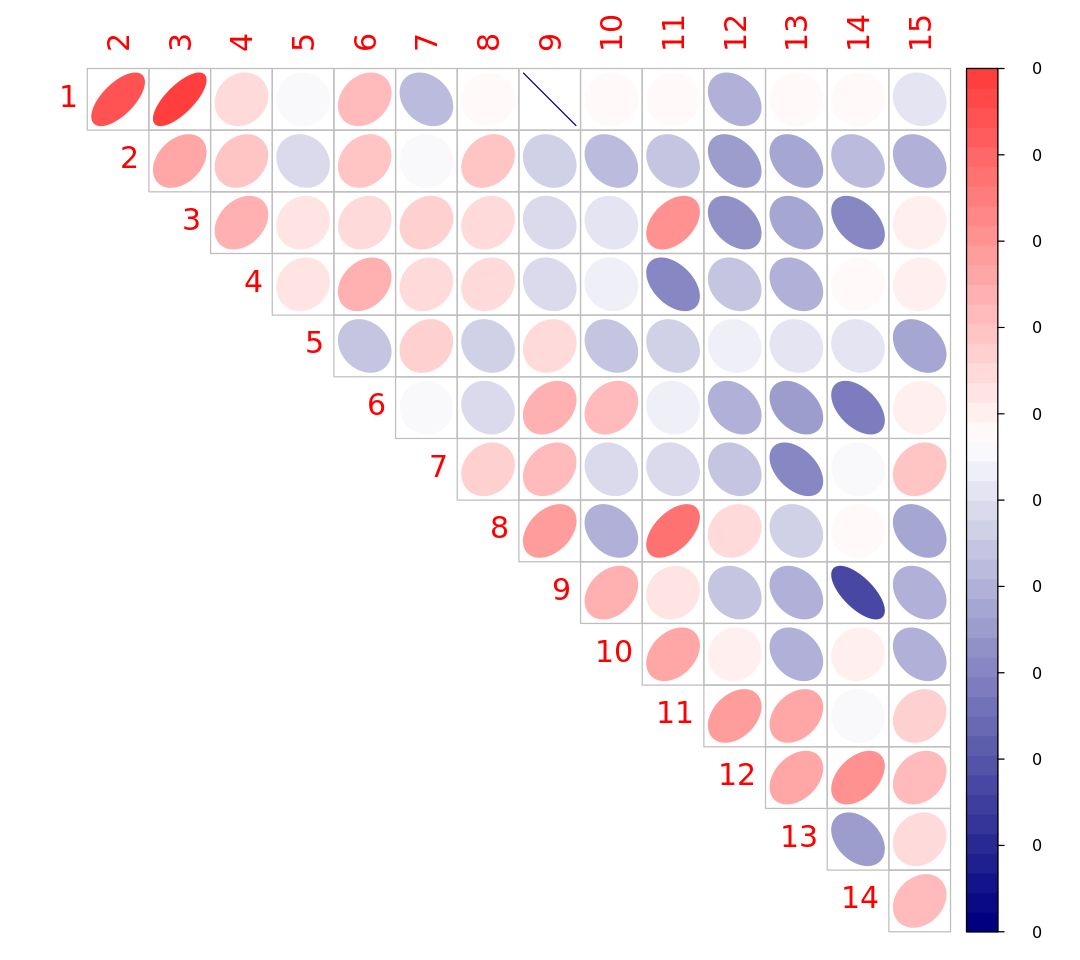

In [102]:
options(repr.plot.width=9, repr.plot.height=8)

col3 = colorRampPalette(c("navy", "white", "red"))(50)
corrplot::corrplot(factorCov, order = 'AOE', col=col3, method = 'ellipse', is.corr = FALSE, tl.cex = 1.5, diag = FALSE, type = 'upper')

In [41]:
k$S %*% t(k$M)

Eef1a1,-0.123890693,-0.10186513,-0.24828401,-0.07620603,-0.07203448,-0.09918380,-0.40142078,-0.13531419,-0.24321667,-0.12473770,⋯,0.060017634,0.03459412,0.03496657,0.05200630,0.04435404,-0.041408583,0.039379129,0.035568732,0.015181216,0.050411427
Tpt1,-0.153849273,-0.08625083,-0.12793175,-0.09538386,-0.06900854,-0.14662751,-0.32363955,-0.14081869,-0.16256852,-0.13046684,⋯,0.108436092,0.08002217,0.06604226,0.09595208,0.09432916,0.077253494,0.087074027,0.071324664,0.122792514,0.081076331
Rps27,-0.160030996,-0.08529947,-0.13944905,-0.06796981,-0.05175068,-0.11266010,-0.25461463,-0.10693357,-0.13119897,-0.09417100,⋯,0.053615733,0.04902039,0.04546410,0.06045684,0.05809332,0.028489793,0.046431933,0.036640103,0.064522329,0.037631902
Rplp0,-0.174850338,-0.09724973,-0.11490116,-0.10612844,-0.05550581,-0.13436773,-0.28421734,-0.11235221,-0.12685887,-0.09366047,⋯,0.073257678,0.06946183,0.07294871,0.06946593,0.06597713,0.023931034,0.050884133,0.057104803,0.094355523,0.053481825
Denr,-0.122889060,-0.07997411,-0.09371549,-0.09560301,-0.05950754,-0.08554512,-0.05005706,-0.06220759,-0.03609388,-0.05744345,⋯,0.037327751,0.03659739,0.04533835,0.02655641,0.03819043,0.074119905,0.039362607,0.043909412,0.075736382,0.038379181
Hmgb2,-0.004781167,-0.03132473,-0.01495794,-0.03747162,-0.02951342,-0.02070209,-0.02106298,-0.01226041,-0.02004437,-0.03868124,⋯,0.026798046,0.02252412,0.02545444,0.01793114,0.02160362,0.055831131,0.033959072,0.024735684,0.064319945,0.030276424
Eif3f,-0.126521406,-0.09741577,-0.18466379,-0.03169689,-0.07217132,-0.01780741,-0.10513834,-0.07827192,-0.13414933,-0.11041386,⋯,0.004908775,0.01587935,0.01080716,0.02558055,0.03162211,0.053441972,0.040943177,0.003690648,0.033494674,0.012522837
Eif3e,-0.017198935,-0.02350404,-0.04834021,-0.02045620,-0.01680043,-0.02422873,-0.08525342,-0.03522704,-0.06674558,-0.03741101,⋯,0.013203700,0.02384103,0.01538141,0.02015222,0.02025261,0.025466375,0.025531127,0.015162091,0.047013639,0.014497734
Eif3k,-0.182595702,-0.11824767,-0.18818309,-0.09078920,-0.08289796,-0.08647237,-0.20504112,-0.09296562,-0.13020569,-0.10367354,⋯,0.019272014,0.02881646,0.04362029,0.02979259,0.02516420,0.017080624,0.022050188,-0.002834438,0.027789604,0.006666894
Eif1,-0.190250097,-0.09398225,-0.12564450,-0.08892917,-0.04867405,-0.10937285,-0.14130932,-0.08333972,-0.06900449,-0.04361672,⋯,0.018061607,0.02456075,0.04670093,0.02261703,0.03705048,-0.009887758,0.006756616,0.029335928,0.009428534,0.015851264
Rpl3,-0.506907950,-0.28247326,-0.53020945,-0.20977262,-0.20412961,-0.23716444,-0.51091421,-0.25051314,-0.36095144,-0.27625028,⋯,0.068879637,0.06230338,0.05608977,0.05992239,0.06312536,0.055313213,0.058698572,0.066720383,0.071445696,0.061734230


In [44]:
1:50

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50

In [47]:
melt(selCoefs)$value

[1] -0.052 -0.255 -0.289 -0.328 -0.140 -0.078 -0.219 -0.065 -0.301 -0.199
   [11] -0.422 -0.273 -0.467 -0.451 -0.458 -0.463 -0.440 -0.614 -0.610 -0.522
   [21] -0.536 -0.388 -0.359 -0.150 -0.231 -0.285 -0.058 -0.188 -0.223 -0.073
   [31] -0.076 -0.341 -0.240 -2.239 -0.335 -0.247 -0.259 -0.320 -0.398 -0.168
   [41] -0.497 -0.458 -0.310 -0.508 -0.376 -0.227 -0.404 -0.291 -0.200 -0.487
   [51] -0.305 -0.358 -0.053 -0.402 -0.095 -0.406 -0.421 -0.527 -0.341 -0.383
   [61] -0.349 -0.396 -0.531 -0.379 -0.303 -0.397 -0.315 -0.260 -0.290 -0.441
   [71] -0.337 -0.449 -0.393 -0.353 -0.475 -0.450 -0.384 -0.537 -0.182 -0.162
   [81] -0.401 -0.497 -0.426 -0.317 -0.289 -0.402 -0.523 -0.435 -0.586 -0.489
   [91] -0.284 -0.374 -0.322  0.126  0.116  0.143  0.011 -0.077 -0.037  0.158
  [101] -0.026  0.008 -0.041 -0.069 -0.135  0.008 -0.043 -0.228 -0.001 -0.232
  [111] -0.064 -0.167 -0.289 -0.089 -0.133 -0.054 -0.103 -0.236 -0.081 -0.058
  [121] -0.156  0.115  0.006  0.084  0.090 -0.160 -0.080 -0.144 -0.195 -0.171
  [131] -0.047 -0.185 -0.117 -0.045 -0.024 -0.060 -0.015  0.020  0.038  0.018
  [141]  0.037 -0.075 -0.322 -0.258 -0.185 -0.024  0.039 -0.066  0.083 -0.141
  [151] -0.243 -0.079 -0.060  0.246 -0.123 -0.050 -0.018 -0.022  0.127 -0.011
  [161]  0.229  0.101 -0.149 -0.041  0.031 -0.120 -0.001 -0.245  0.025  0.036
  [171] -0.145 -0.159 -0.078  0.041 -0.079  0.056  0.012  0.036 -0.104  0.074
  [181] -0.019  0.141 -0.060 -0.065 -0.035  0.032 -0.062  0.018  0.082 -0.072
  [191] -0.039 -0.145  0.087  0.007  0.036 -0.076 -0.026  0.057  0.069 -0.063
  [201] -0.068 -0.025 -0.031 -0.038 -0.053 -0.127 -0.170 -0.305 -0.092 -0.281
  [211] -0.181 -0.017 -0.190 -0.091 -0.312 -0.146 -0.145 -0.418 -0.195 -0.048
  [221] -0.051 -0.167 -0.057  0.064  0.102  0.011 -0.043 -0.225  0.001 -0.096
  [231] -0.200 -0.093 -0.267 -0.171 -0.317 -0.005 -0.047 -0.397 -0.124  0.065
  [241] -0.307 -0.336 -0.054  0.014 -0.452 -0.259 -0.170 -0.101 -0.053 -0.079
  [251] -0.149 -0.185 -0.327 -0.220 -0.241 -0.183 -0.267 -0.467 -0.201 -0.400
  [261] -0.146 -0.187 -0.283 -0.176 -0.012 -0.281 -0.198 -0.186 -0.217 -0.374
  [271] -0.138 -0.205 -0.141 -0.031 -0.109 -0.152 -0.095 -0.122 -0.011 -0.261
  [281] -0.136 -0.083 -0.245 -0.397 -0.264 -0.277 -0.121 -0.150 -0.056 -0.124
  [291] -0.158 -0.062 -0.116 -0.134 -0.058 -0.039 -0.211 -0.291 -0.354 -0.084
  [301] -0.263 -0.143 -0.241 -0.102 -0.253 -0.109  0.021 -0.078  0.010 -0.124
  [311] -0.044 -0.070 -0.015 -0.070 -0.149 -0.156 -0.053 -0.050 -0.262 -0.238
  [321] -0.291 -0.034 -0.112 -0.039  0.012  0.145 -0.256 -0.080 -0.091 -0.264
  [331] -0.006 -0.201 -0.008 -0.121 -0.003 -0.188 -0.098 -0.136 -0.101 -0.127
  [341] -0.312 -0.317 -0.280 -0.239 -0.191 -0.289 -0.243 -0.233 -0.288 -0.204
  [351] -0.057 -0.188 -0.280 -0.104 -0.381 -0.317 -0.246 -0.006  0.042 -0.073
  [361]  0.004 -0.172 -0.088  0.044 -0.136 -0.026 -0.053 -0.087 -0.289  0.144
  [371]  0.043  0.003  0.031  0.012  0.051 -0.054  0.099 -0.027 -0.009 -0.135
  [381]  0.103  0.151 -0.002  0.091  0.033  0.006 -0.058 -0.016  0.217  0.212
  [391] -0.005  0.119  0.127  0.118  0.074  0.177  0.148  0.175  0.005  0.098
  [401] -0.049  0.042  0.043  0.021  0.036  0.207  0.085  0.158  0.112  0.049
  [411]  0.045  0.024 -0.115  0.017 -0.074  0.096  0.105  0.330 -0.002 -0.062
  [421]  0.033  0.013  0.030  0.043  0.092  0.156  0.025  0.173  0.010 -0.115
  [431]  0.025  0.052  0.033 -0.051  0.069  0.063  0.143 -0.047  0.189  0.081
  [441]  0.037 -0.195  0.114  0.056  0.364  0.075  0.097 -0.055 -0.015 -0.026
  [451] -0.019 -0.167  0.038 -0.081  0.051  0.009 -0.048 -0.050  0.081  0.422
  [461] -0.003  0.039  0.027  0.067  0.075  0.012 -0.052 -0.019  0.153 -0.023
  [471]  0.179 -0.100  0.119 -0.014 -0.043  0.027  0.128  0.131  0.107  0.095
  [481] -0.063 -0.117 -0.242 -0.165 -0.123 -0.008  0.076 -0.100  0.012 -0.016
  [491]  0.000 -0.053  0.004  0.031 -0.074  0.149  0.052  0.025 -0.118  0.054
  [501]  0.129 -0.016  0.196  0.086 -0.006  0.057 -0.083 -0.009 -0.065 -0.213
  [511] -0.156  0.038  0.1

In [80]:
actualVals = melt(selCoefs)$value
allR2 <- list()

for(i in 2:100){
    k <- icaimax(selCoefs, nc = i, center = T)
    redVals = k$S %*% t(k$M)
    reconstVal = melt(redVals)$value
    R2 = myR2(reconstVal, actualVals)
    allR2 <- lappend(allR2, c("k"=i, "R2"=R2))
}

In [81]:
allR2 <- data.frame(do.call(rbind,allR2))

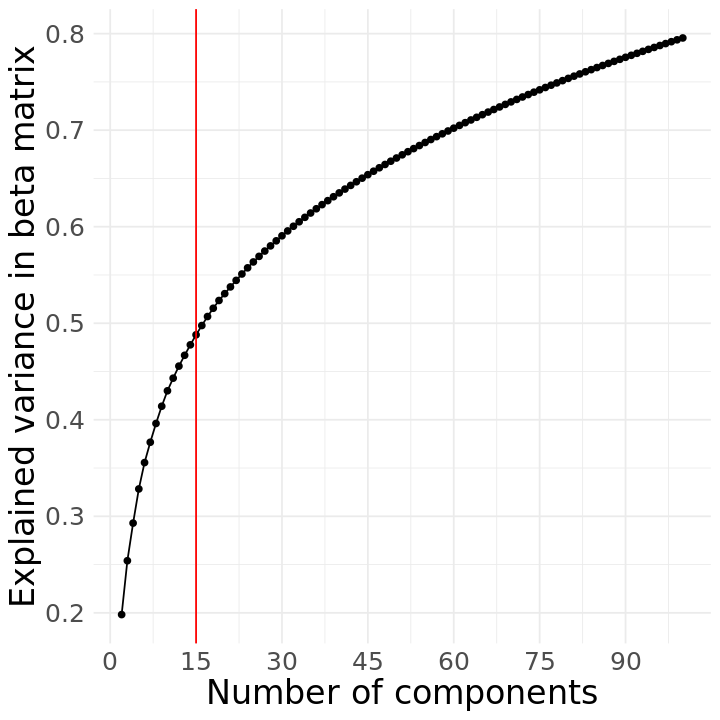

In [94]:
options(repr.plot.width=6, repr.plot.height=6)

ggplot(data=allR2, aes(x=k, y=R2)) +
  geom_line()+
  geom_point()+geom_vline(xintercept=15, color="red")+theme_minimal()+
xlab("Number of components")+ ylab("Explained variance in beta matrix")+
scale_x_continuous(breaks=seq(0, 100, 15))+
scale_y_continuous(breaks=seq(0, 0.8, 0.1))+
theme(axis.text=element_text(size=15),axis.title=element_text(size=20))


In [79]:
allR2


k,R2
<dbl>,<dbl>
2,0.1981857
3,0.2539658
4,0.2929592
5,0.3283288
6,0.3556437
7,0.3767279
8,0.3961574
9,0.4140185
10,0.4300076
